In [209]:
%reset -f
import sys
import os
import pcse
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
plt.close("all")
%clear

In [210]:
data_dir = r'E:\23年调参\拟合调参\44'

In [211]:
from pcse.fileinput import CABOFileReader
soilfile = os.path.join(data_dir, '土壤44.soil')

In [212]:
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider

In [213]:
sitedata = WOFOST71SiteDataProvider(WAV=30, CO2=360)

Unknown parameter values provided to WOFOSTSiteDataProvider: {'CO2': 360}


In [214]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, '管理44.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)

In [215]:
from pcse.fileinput import ExcelWeatherDataProvider
weatherdataprovider = ExcelWeatherDataProvider(os.path.join(data_dir, "44.xlsx"))

In [216]:
from pcse.base import ParameterProvider
from pcse.models import Wofost72_WLP_FD
cropfile = os.path.join(data_dir, '作物44.crop')
cropdata = CABOFileReader(cropfile)
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)

In [217]:
di_days=[120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176]
import datetime 
dob = [datetime.date(2023,3,10),datetime.date(2023,3,11),datetime.date(2023,3,12),datetime.date(2023,3,13),datetime.date(2023,3,14),datetime.date(2023,3,15),datetime.date(2023,3,16),datetime.date(2023,3,17),datetime.date(2023,3,18),datetime.date(2023,3,19),datetime.date(2023,3,20),datetime.date(2023,3,21),datetime.date(2023,3,22),datetime.date(2023,3,23),datetime.date(2023,3,24),datetime.date(2023,3,25),datetime.date(2023,3,26),datetime.date(2023,3,27),datetime.date(2023,3,28),datetime.date(2023,3,29),datetime.date(2023,3,30),datetime.date(2023,3,31),datetime.date(2023,4,1),datetime.date(2023,4,2),datetime.date(2023,4,3),datetime.date(2023,4,4),datetime.date(2023,4,5),datetime.date(2023,4,6),datetime.date(2023,4,7),datetime.date(2023,4,8),datetime.date(2023,4,9),datetime.date(2023,4,10),datetime.date(2023,4,11),datetime.date(2023,4,12),datetime.date(2023,4,13),datetime.date(2023,4,14),datetime.date(2023,4,15),datetime.date(2023,4,16),datetime.date(2023,4,17),datetime.date(2023,4,18),datetime.date(2023,4,19),datetime.date(2023,4,20),datetime.date(2023,4,21),datetime.date(2023,4,22),datetime.date(2023,4,23),datetime.date(2023,4,24),datetime.date(2023,4,25),datetime.date(2023,4,26),datetime.date(2023,4,27),datetime.date(2023,4,28),datetime.date(2023,4,29),datetime.date(2023,4,30),datetime.date(2023,5,1),datetime.date(2023,5,2),datetime.date(2023,5,3),datetime.date(2023,5,4),datetime.date(2023,5,5)]
time_1 = [datetime.date(2023,2,28),datetime.date(2023,3,20),datetime.date(2023,4,16),datetime.date(2023,5,3)]
time_2 = [datetime.date(2023,2,28),datetime.date(2023,3,20),datetime.date(2023,4,16)]
xob = [6.35,6.39,6.50,6.57,6.66,6.72,6.80,6.85,6.92,6.96,7.02,7.05,7.09,7.12,7.13,7.15,7.17,7.17,7.17,7.16,7.14,7.13,7.10,7.07,7.03,6.99,6.93,6.89,6.84,6.79,6.71,6.65,6.52,6.49,6.38,6.30,6.22,6.13,5.99,5.85,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75,5.75]
tagp_true = [2114,3122,8344,12103]
twso_true = [126,746,5105,6218]
twst_true = [1344,1949,3142,3244]
twlv_true = [645,426,97]
nob = len(dob)
total_lens=176

In [218]:
wofsim = Wofost72_WLP_FD(parameters, weatherdataprovider, agromanagement)

In [219]:
xy = np.zeros(total_lens,float16)
for i in range(total_lens):
    for j in range(nob):
        if i==di_days[j]:
            wofsim.run_till(dob[j])
            wofsim.set_variable('LAI',xob[j])
    xy[i]= wofsim.get_variable('TWSO')
    wofsim.run()
output = wofsim.get_output()
ds = [t["day"] for t in output]
xs =  [t["LAI"] for t in output]
dvs =  [t["DVS"] for t in output]
tagp =  [t["TAGP"] for t in output]
twso =  [t["TWSO"] for t in output]

date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_till() function before current model date.
date argument for run_til

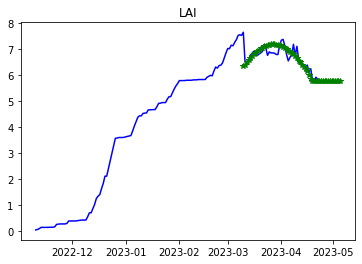

In [220]:
plt.plot(ds,xs,'b')   
plt.plot(dob, xob,'g*')
plt.title("LAI")
plt.show()

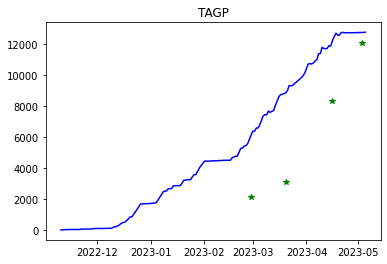

In [221]:
plt.plot(time_1, tagp_true,'g*')
plt.plot(ds, tagp,'b')
plt.title("TAGP")
plt.show()

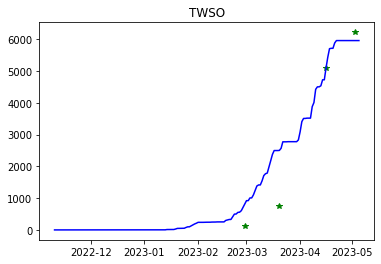

In [222]:
plt.plot(time_1, twso_true,'g*')
plt.plot(ds, twso,'b')
plt.title("TWSO")
plt.show()